In [1]:
#!pip install ipython

In [2]:
!pip install ipython

In [2]:
# Import the libraries 
#!pip install scikit-learn==0.22.2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
from scipy.stats import zscore
from sklearn import mixture
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [5]:
#from Ipython.display import Image
#from Ipython.display import display
!pip install pydotplus
from IPython.display import display, Image
import pydotplus as pydot
from sklearn import tree
from os import system
from pprint import pprint

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("concrete (1).csv")

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [12]:
actual_stregnth=df['strength']

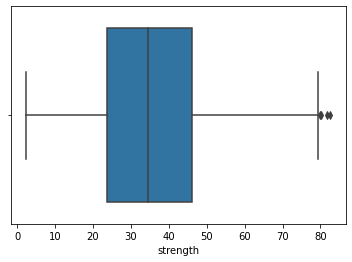

In [13]:
sns.boxplot(actual_stregnth)

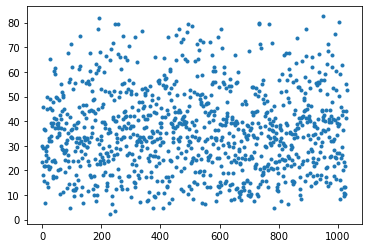

In [14]:
plt.plot(df.strength,'.')

In [15]:
strength_by_age=df.groupby("age")["strength"].describe().reset_index()

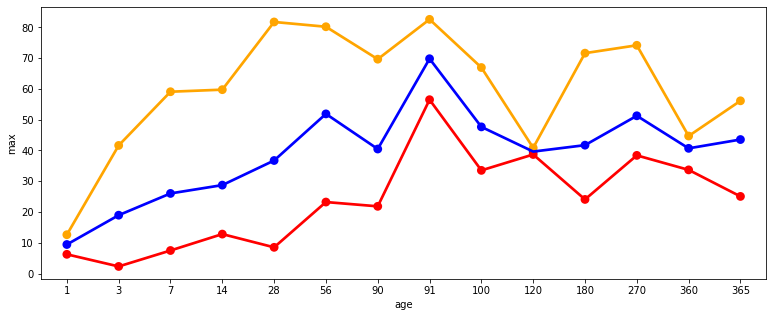

In [16]:
fig=plt.figure(figsize=(13,5))
sns.pointplot(x='age',y='mean',data=strength_by_age, color='blue')
sns.pointplot(x='age',y='min',data=strength_by_age, color='red')
sns.pointplot(x='age',y='max',data=strength_by_age, color='orange')

In [17]:
df['water_cement']=df['cement']/df['water']

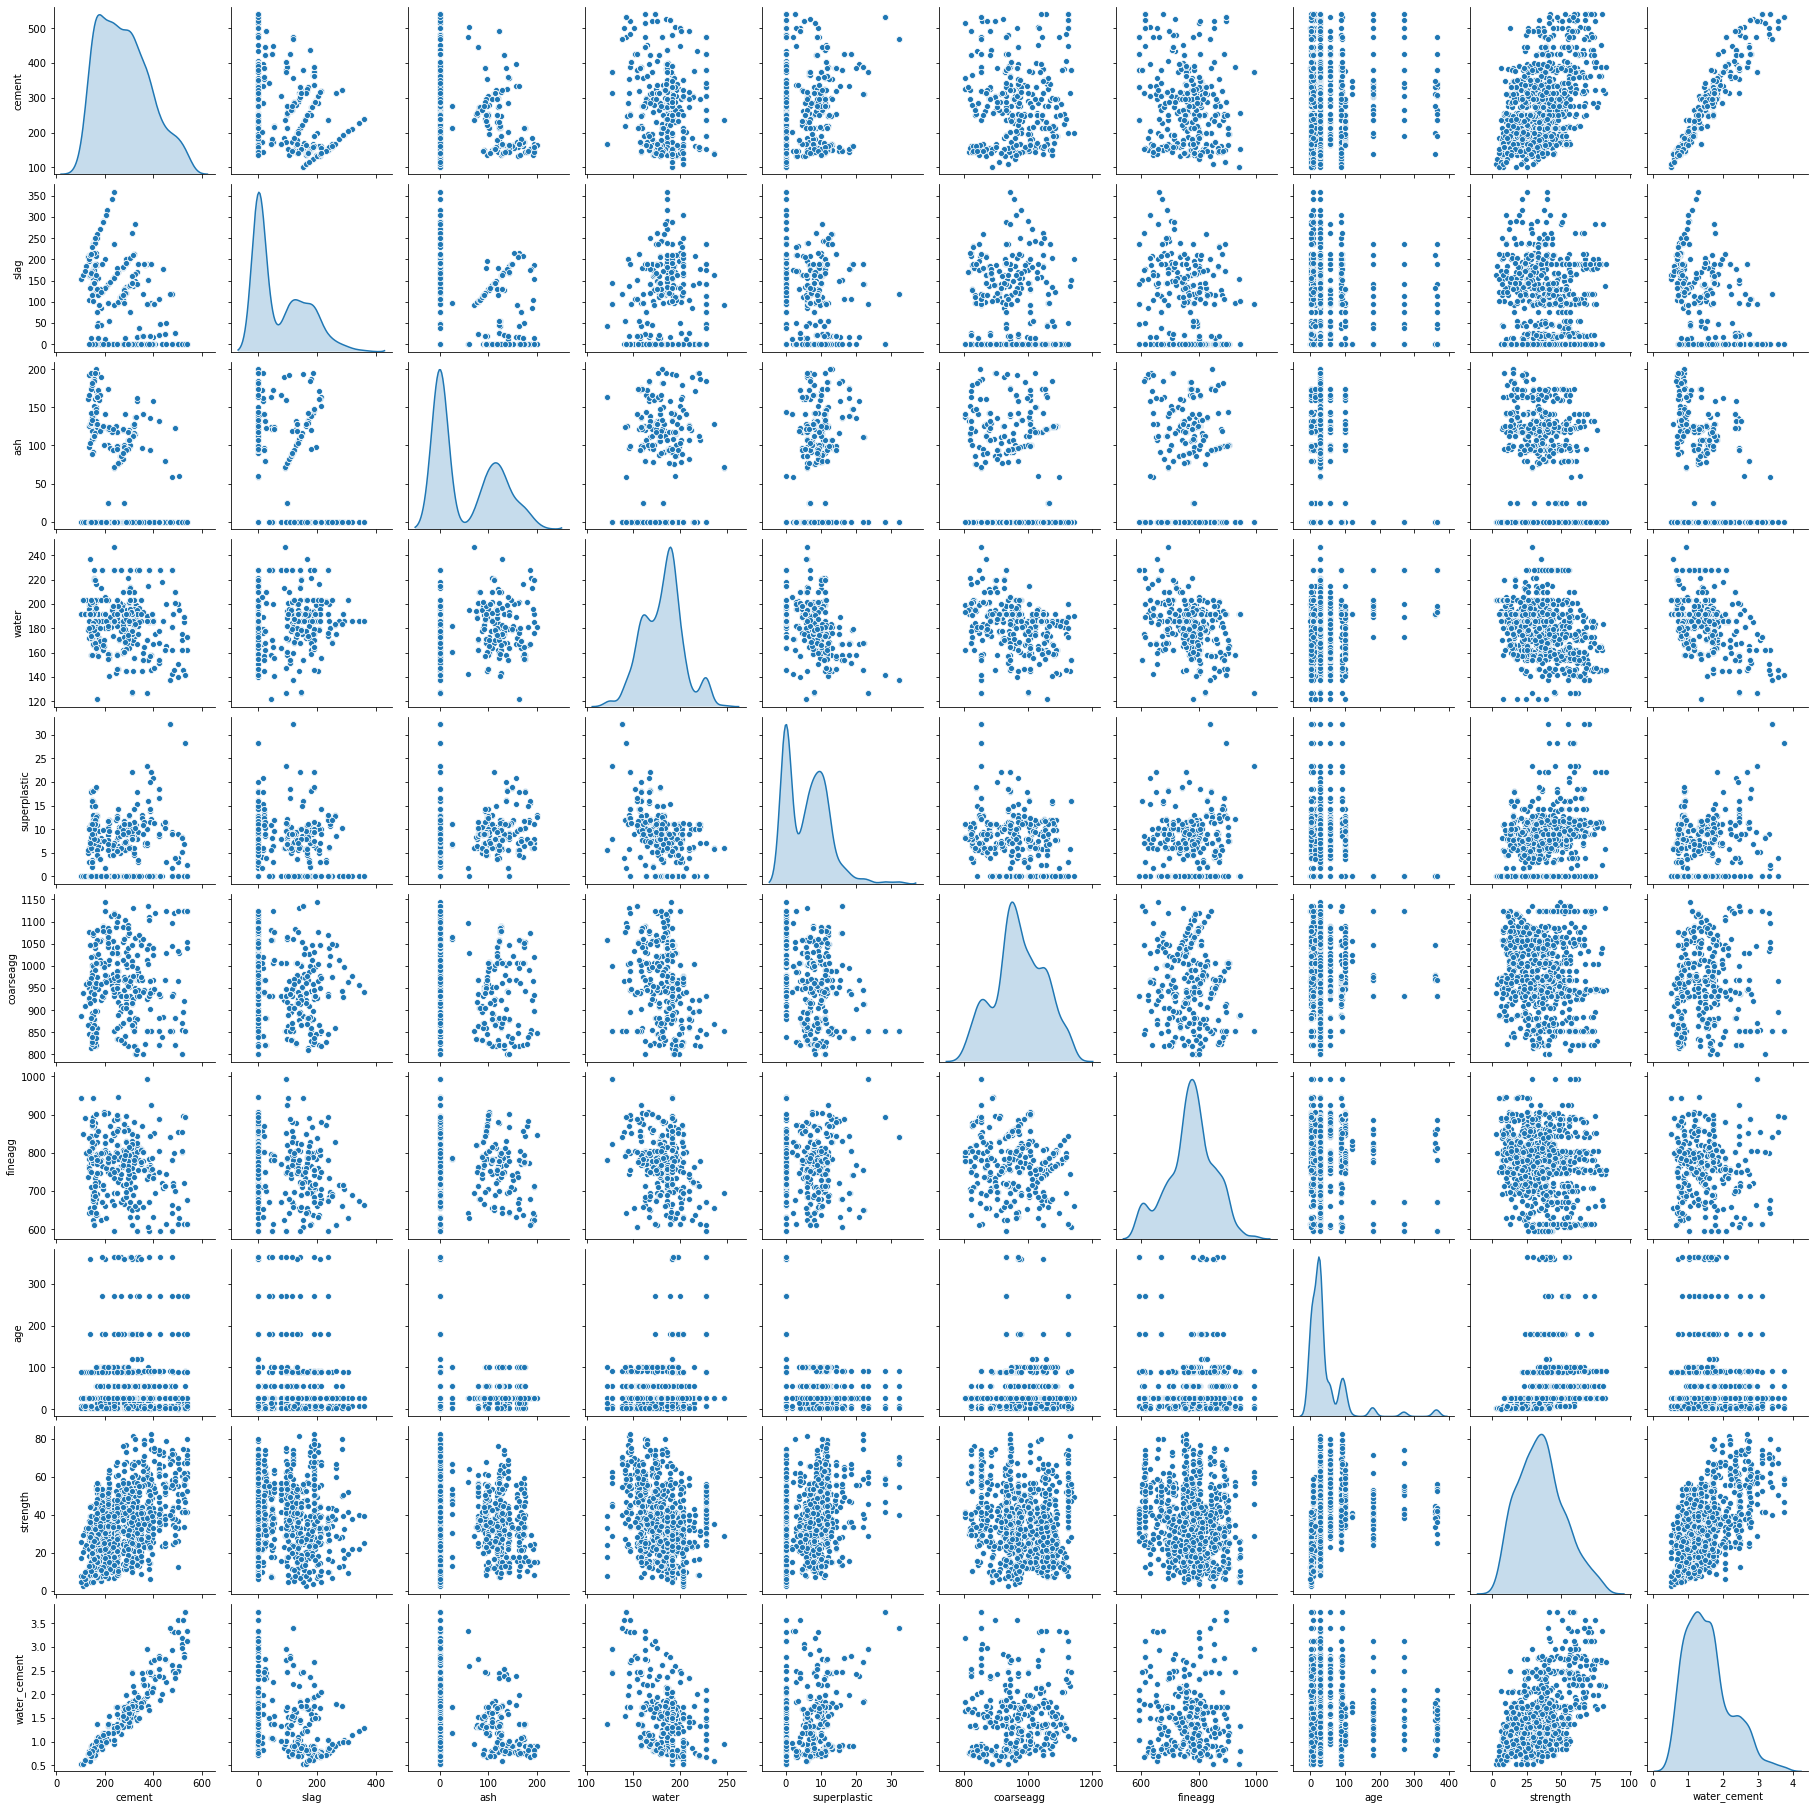

In [18]:
#Pairplot using sns
sns.pairplot(df,diag_kind='kde')

In [20]:
clf=mixture.BayesianGaussianMixture(n_components=3,covariance_type='full')
clf.fit(df.coarseagg.values.reshape(-1,1))

BayesianGaussianMixture(n_components=3)

In [21]:
df['coarseagg_gaussian']=clf.predict([[i] for i in df.coarseagg.values])

In [23]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement,coarseagg_gaussian
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0.694349,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1.066961,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1.334045,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1.166667,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0.800828,2
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,0.750000,0
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,3.746827,1
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1.538976,1
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,1.500000,0


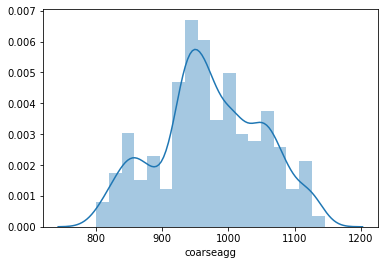

In [25]:
sns.distplot(df.coarseagg)

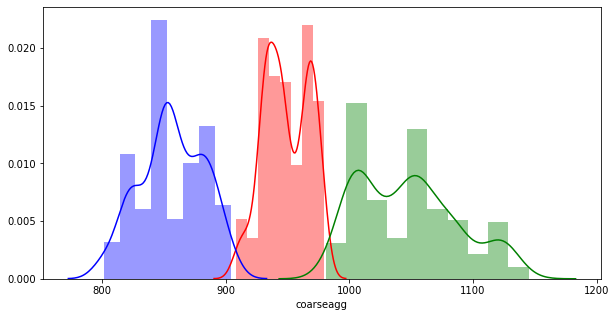

In [27]:
fig=plt.figure(figsize=(10,5))
sns.distplot(df[df['coarseagg_gaussian']==0].coarseagg, color='red')
sns.distplot(df[df['coarseagg_gaussian']==1].coarseagg, color='blue')
sns.distplot(df[df['coarseagg_gaussian']==2].coarseagg, color='green')

In [28]:
df_z=df
df_z[df.columns[:-1]]=df[df.columns[:-1]].apply(zscore)
#to convert values to Z score to remove different units

In [29]:
df_z=pd.DataFrame(df_z, columns=df.columns)
df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement,coarseagg_gaussian
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,-1.364534,0
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,-0.789327,2
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,-0.377027,0
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,-0.635411,0
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,-1.200161,2
